In [1]:
# 1. Load the dataset and perform basic data exploration:

import pandas as pd
df=pd.read_csv(r'/content/wine.csv')
print(df)

     Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  D

In [2]:
# perform EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [3]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [6]:
df.shape

(178, 14)

In [10]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['Color'])
y = df['Color']

In [12]:
#Step 4: Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64


#	 **Examine** the distribution of features using histograms, box plots, or density plots.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

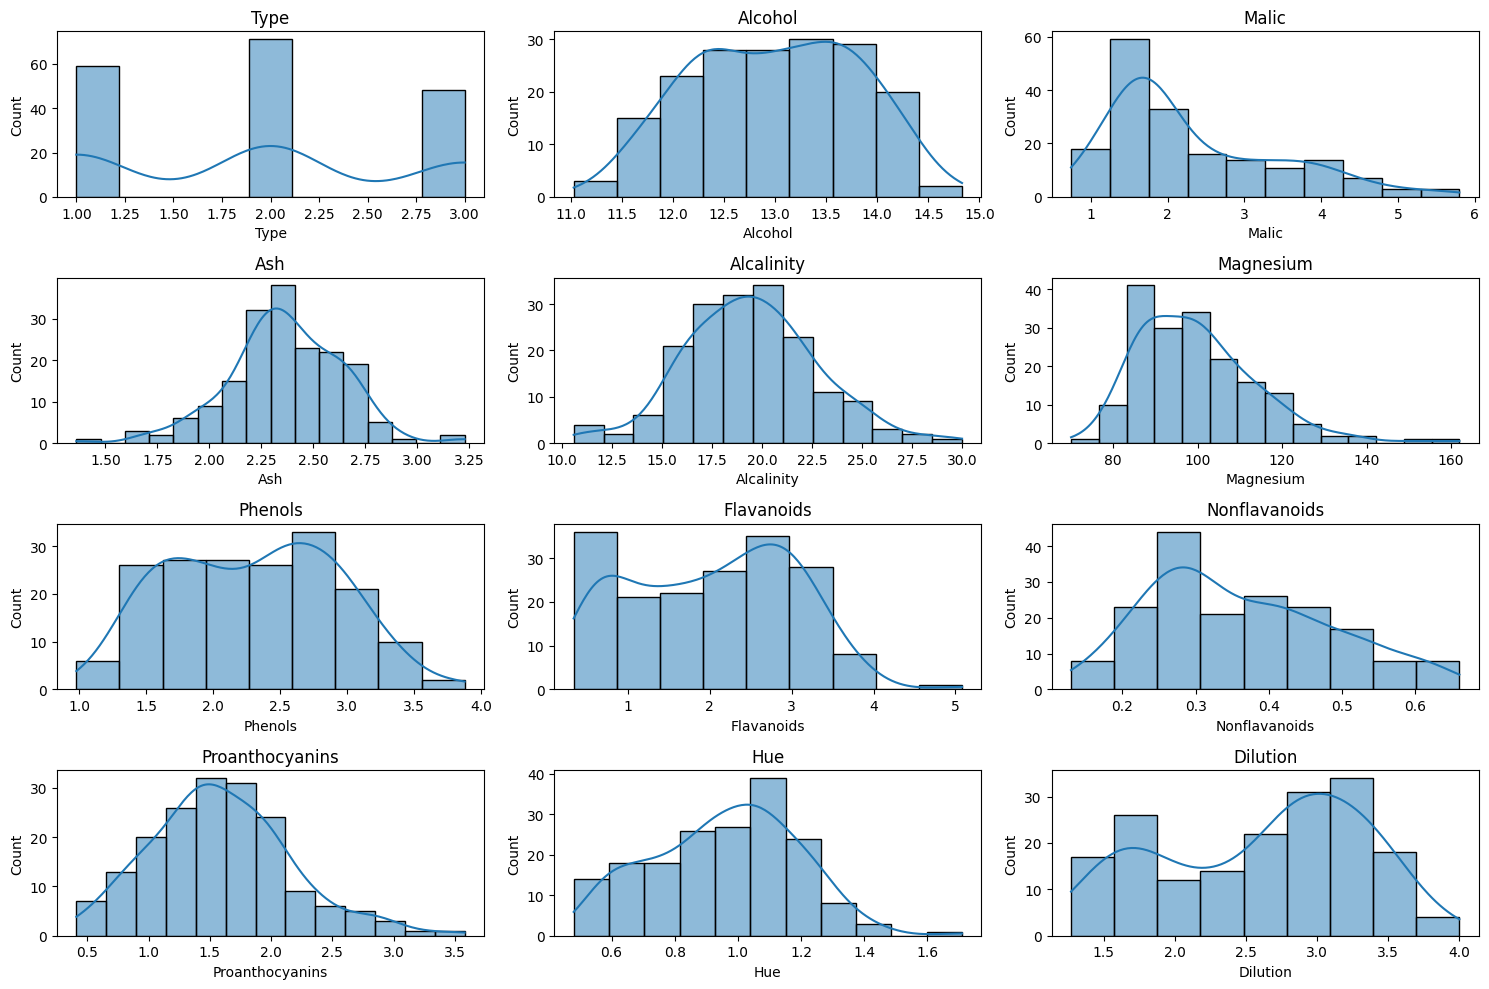

In [31]:
# Plot histograms
# Create subplots for each feature
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))  # Adjust figsize as needed
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing
feature_names = X.columns
# Plot histograms for each feature
for ax, feature_name in zip(axes.flatten(), feature_names):
    sns.histplot(x=X[feature_name], ax=ax, kde=True)
    ax.set_title(feature_name)

plt.tight_layout()
plt.show()

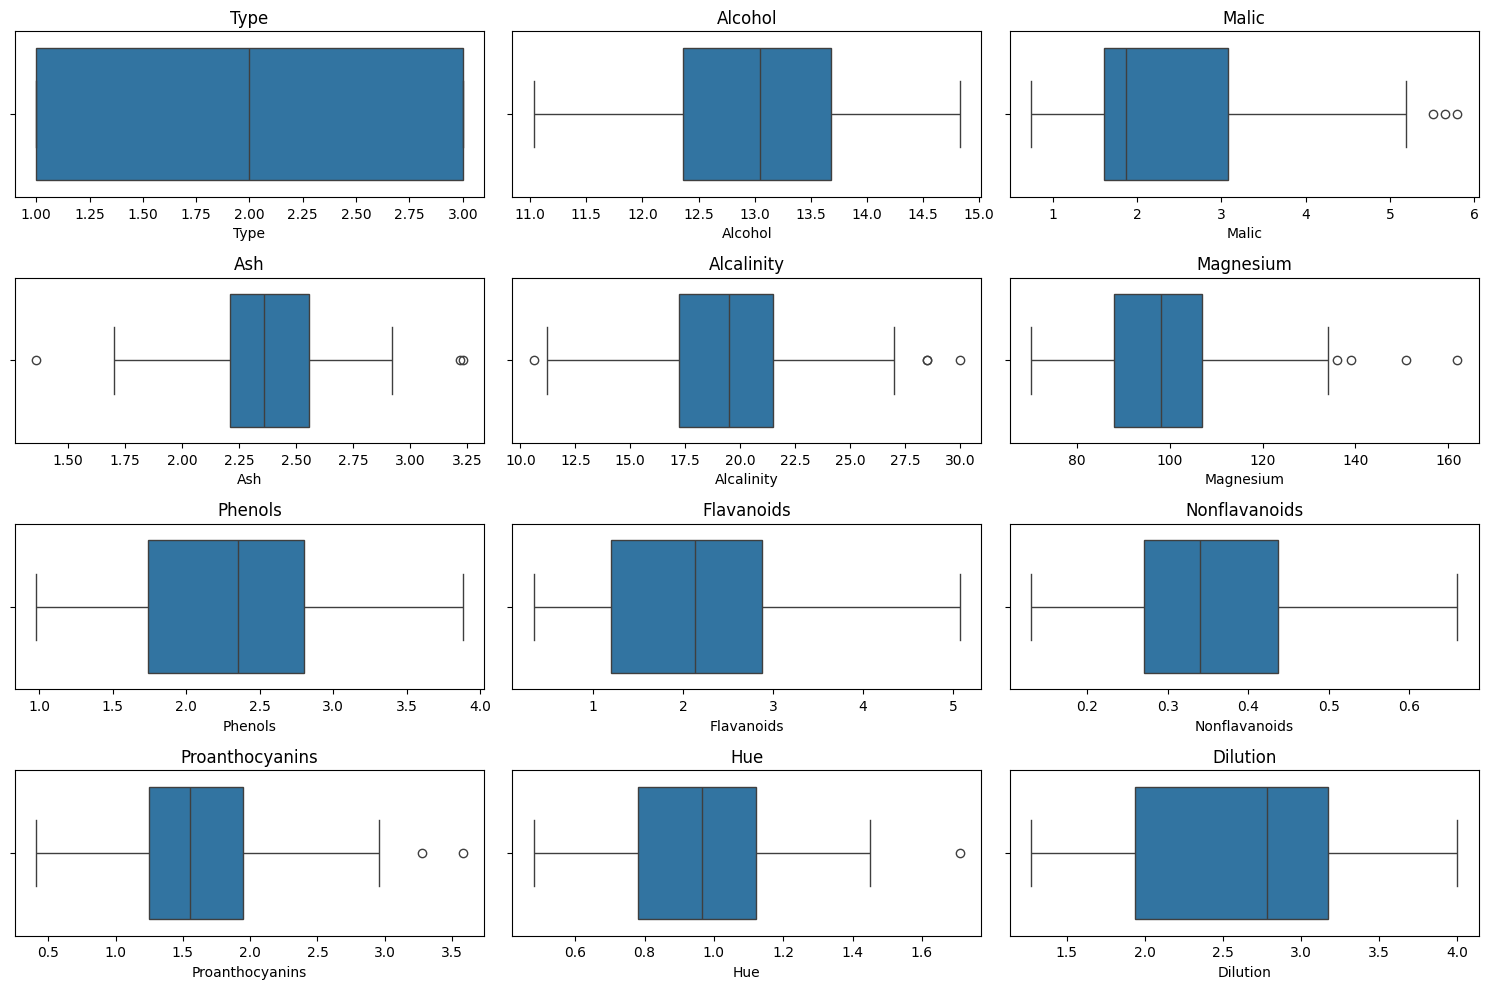

In [30]:
# Plot Boxplot
# Create subplots for each feature
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))  # Adjust figsize as needed
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing
feature_names = X.columns
# Plot box plots for each feature
for ax, feature_name in zip(axes.flatten(), feature_names):
    sns.boxplot(x=X[feature_name], ax=ax)
    ax.set_title(feature_name)

plt.tight_layout()
plt.show()

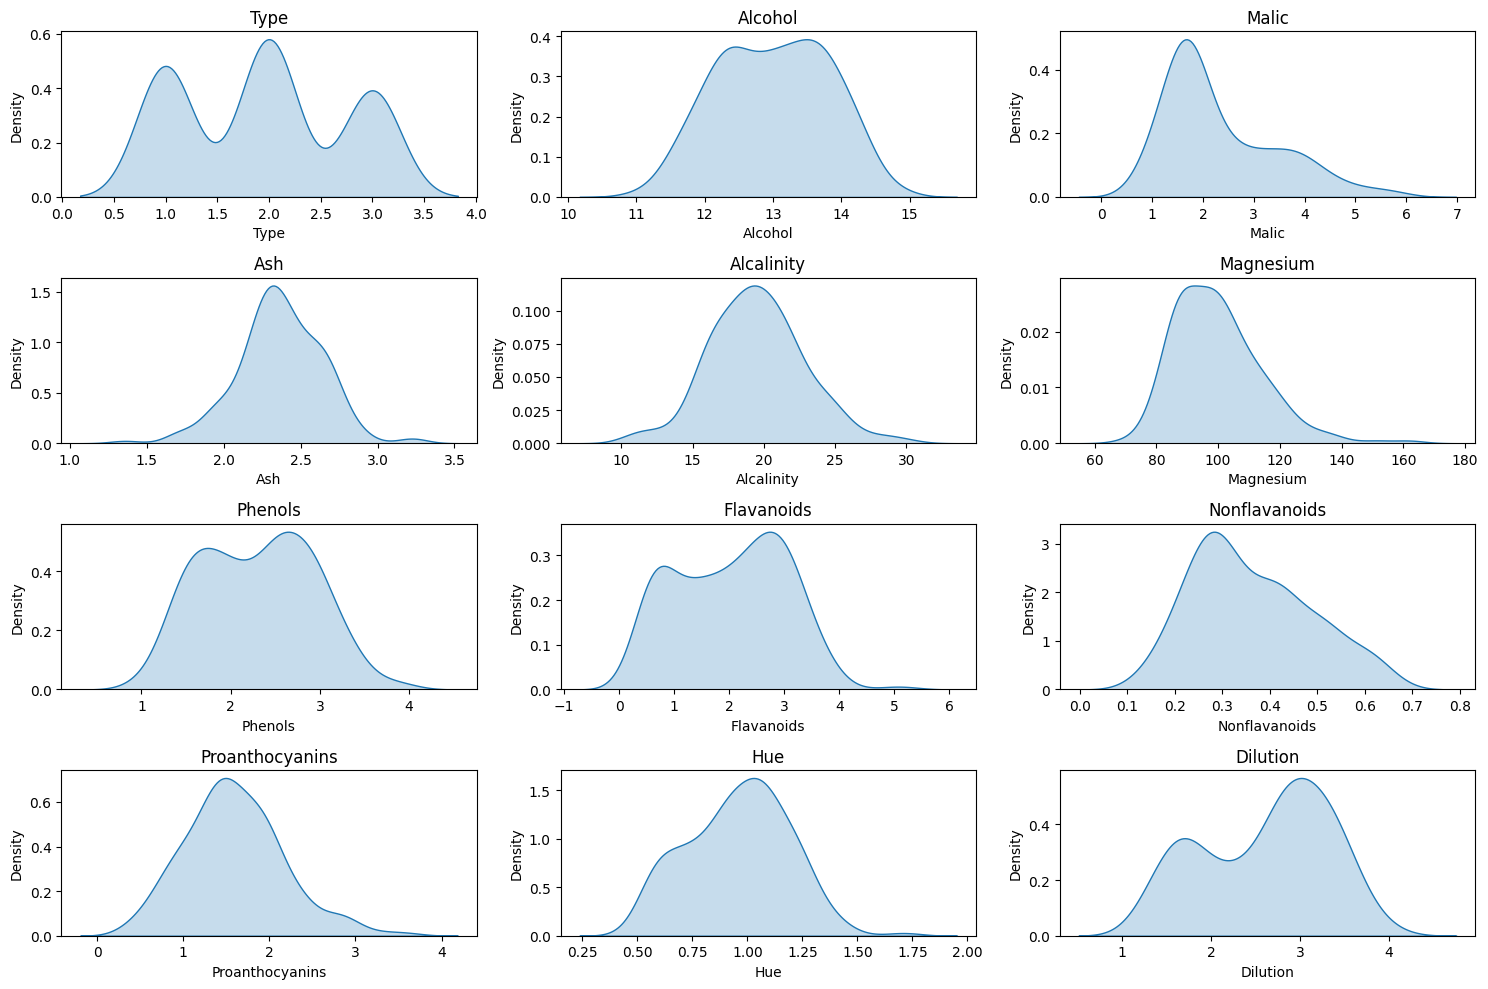

In [29]:
# plot density plot
# Create subplots for each feature
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))  # Adjust figsize as needed
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing

# Plot density plots for each feature
for ax, feature_name in zip(axes.flatten(),feature_names):
    sns.kdeplot(x=X[feature_name], ax=ax,fill=True)
    ax.set_title(feature_name)

plt.tight_layout()
plt.show()

## #	**Investigate** correlations between features to understand relationships within the data

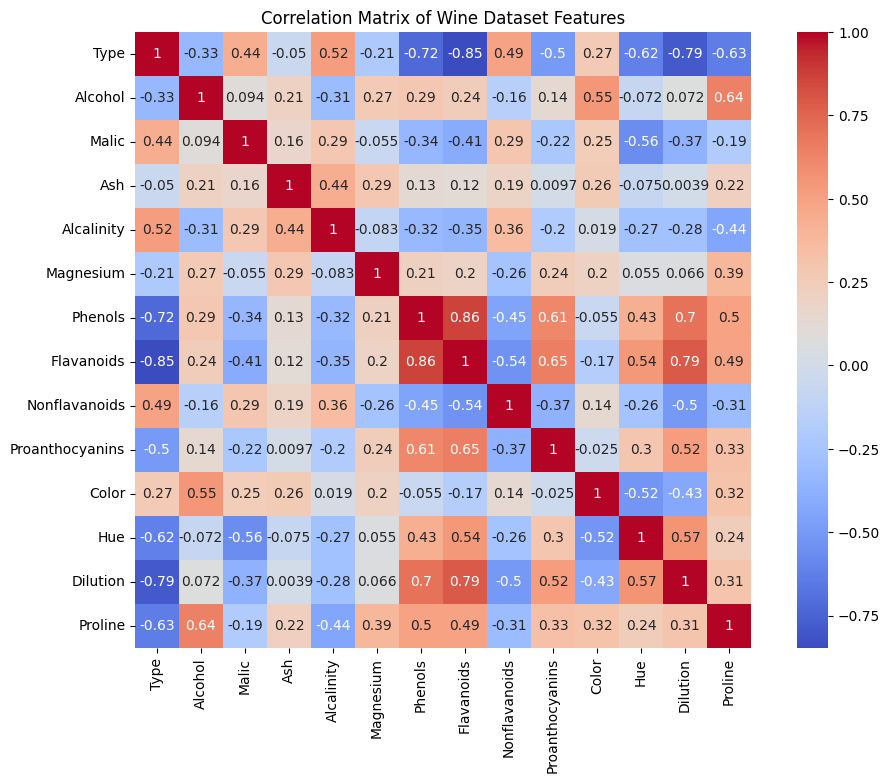

In [32]:
# Correlation between features
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Wine dataset
wine_data = pd.read_csv(r'/content/wine.csv')

# Compute pairwise correlations
corr_matrix = wine_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Wine Dataset Features')
plt.show()

# 2. **Dimensionality** **Reduction** with **PCA**:

In [33]:
# Step 1 : Standardize the features
from sklearn.preprocessing import StandardScaler

# Assuming 'X' contains the features of the Wine dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Use PCA to transform the standardized features into principal components.

In [36]:
# Step2 :Implement PCA to reduce dimensionality
from sklearn.decomposition import PCA
import numpy as np

# Initialize PCA with the number of components you want to keep
pca = PCA(n_components=None)  # You can specify the number of components explicitly if needed

# Fit PCA on the scaled data
pca.fit(X_scaled)

# Access explained variance ratio and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)


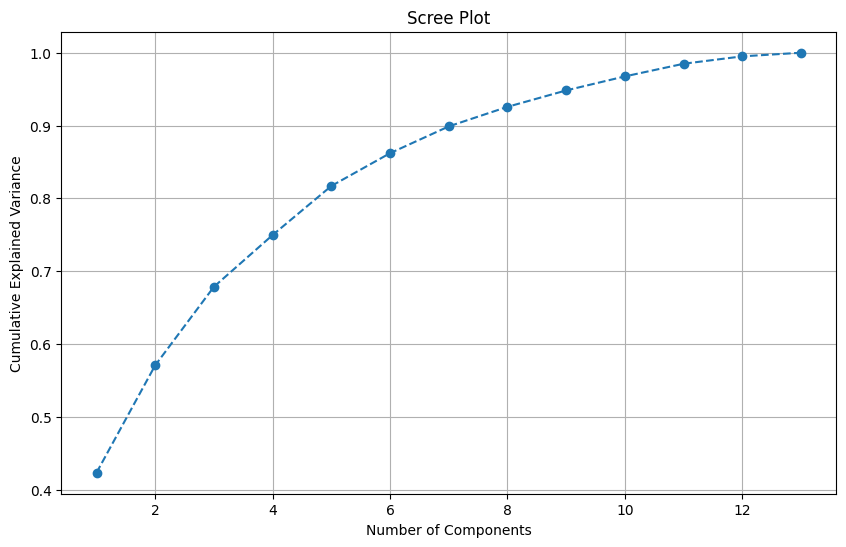

In [37]:
# Step3 :  Determine the optimal number of principal components
# Determine the optimal number of principal components by analyzing the explained variance ratio
# or using a scree plot to visualize cumulative explained variance.
# scree plot Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [38]:
 # Cumulative explained variance method:
 # Print explained variance ratios for each component
for i, ev in enumerate(explained_variance_ratio, start=1):
    print(f'Explained variance ratio of PC{i}: {ev:.3f}')

# Determine the number of components that explain a desired amount of variance
desired_variance = 0.95  # Example threshold
num_components = np.argmax(cumulative_explained_variance >= desired_variance) + 1

print(f'Number of components explaining {desired_variance * 100}% variance: {num_components}')

Explained variance ratio of PC1: 0.423
Explained variance ratio of PC2: 0.148
Explained variance ratio of PC3: 0.108
Explained variance ratio of PC4: 0.071
Explained variance ratio of PC5: 0.067
Explained variance ratio of PC6: 0.045
Explained variance ratio of PC7: 0.037
Explained variance ratio of PC8: 0.027
Explained variance ratio of PC9: 0.023
Explained variance ratio of PC10: 0.019
Explained variance ratio of PC11: 0.017
Explained variance ratio of PC12: 0.010
Explained variance ratio of PC13: 0.005
Number of components explaining 95.0% variance: 10


In [39]:
 # Step 4.	Transform the original dataset into the principal components.
 # Transform the original standardized dataset into the principal components using the selected number of components.
 # Use the identified number of components to transform the original data
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

# X_pca now contains the original data transformed into principal components


Standardization: Standardizing features ensures that each feature contributes equally to the PCA process.

PCA: PCA identifies new orthogonal axes (principal components) that maximize variance explained in the data.
Explained Variance: The explained_variance_ratio_ attribute of PCA provides the proportion of variance explained by each principal component.

Scree Plot: Helps visualize how much variance each principal component contributes and aids in determining the number of components to retain.

Cumulative Explained Variance: Summing the explained variance ratios helps in understanding how much of the total variance in the dataset is explained by the first n principal components.
By following these steps, we can effectively perform dimensionality reduction with PCA on the Wine dataset, ensuring optimal selection of principal components based on explained variance analysis.

# 3. **Clustering with Original Data**:

In [40]:
# Step 1 : Apply a clustering algorithm (K-means) to the original dataset
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'X' contains the features of the Wine dataset
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters for Wine dataset
cluster_labels = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


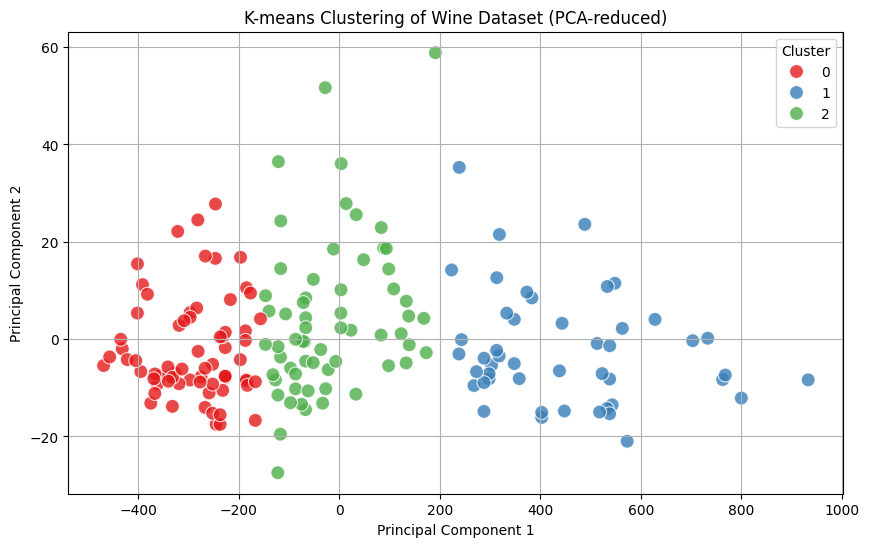

In [41]:
# Step 2. Visualize the clustering results using appropriate plots
# For visualization, since the dataset has multiple features, dimensionality reduction techniques like PCA could help in visualizing clusters in a 2D plot.
# Here, we'll visualize the first two principal components:
from sklearn.decomposition import PCA

# Perform PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='Set1', s=100, alpha=0.8)
plt.title('K-means Clustering of Wine Dataset (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# scatter plot where each point represents a data sample, colored by the cluster it belongs to based on K-means clustering.

In [42]:
# Evaluate the clustering performance using metrics using Silhouette score
# Silhoutte score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.571


K-means clustering: Assigns each data point to the nearest cluster center, minimizing the within-cluster variance.

PCA for visualization: Reduces the dimensions of the dataset to 2 principal components for easy visualization.

Visualization: Scatter plot with clusters colored by their labels helps understand the separation of clusters in reduced dimensions.

Silhouette score: Measures how similar each point is to its own cluster compared to other clusters. Higher score indicates better-defined clusters.

# 4. **Clustering with PCA Data:**

In [43]:
# Apply the clustering algorithm to the PCA-transformed dataset
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'X' contains the features of the Wine dataset
# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply K-means clustering on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters for Wine dataset
cluster_labels_pca = kmeans_pca.fit_predict(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


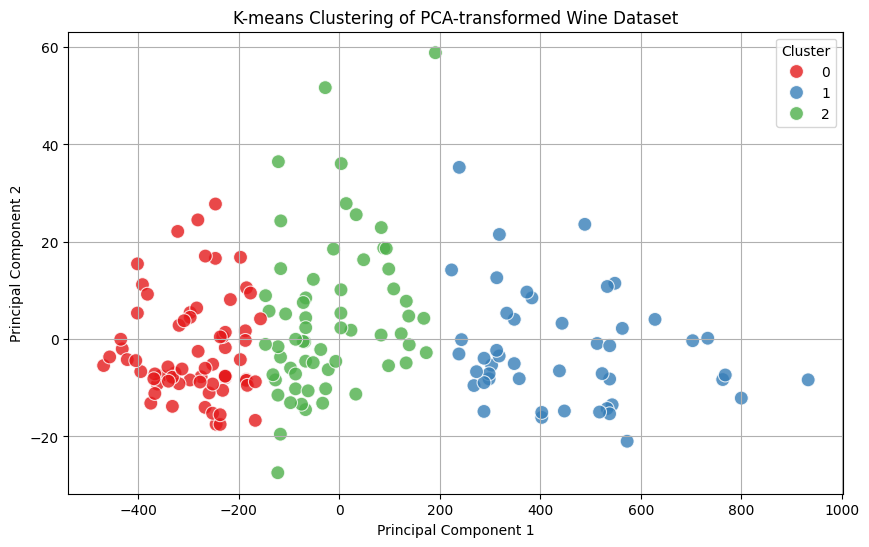

In [44]:
# Visualize the clustering results from PCA-transformed data
# Plot the clusters from PCA-transformed data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels_pca, palette='Set1', s=100, alpha=0.8)
plt.title('K-means Clustering of PCA-transformed Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [46]:
# Compare clustering results from PCA-transformed data with original dataset
# To compare the clustering results, you can visually inspect the plots and also evaluate performance metrics such as
# silhouette score or Davies–Bouldin index for both approaches (original data and PCA-transformed data)

from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate clustering performance on original data
cluster_labels_original = kmeans.fit_predict(X)

# Evaluate silhouette scores
silhouette_avg_original = silhouette_score(X, cluster_labels_original)
silhouette_avg_pca = silhouette_score(X_pca, cluster_labels_pca)

print('Original Data:')
print(f'Silhouette Score: {silhouette_avg_original:.3f}')


print('\nPCA-transformed Data:')
print(f'Silhouette Score: {silhouette_avg_pca:.3f}')


Original Data:
Silhouette Score: 0.571

PCA-transformed Data:
Silhouette Score: 0.572


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


PCA transformation: Reduces the dimensions of the dataset to 2 principal components (n_components=2) for visualization and clustering.

Clustering: Applies K-means clustering to the reduced-dimensional PCA-transformed data (X_pca).
Visualization: Scatter plot visualizes clusters in PCA-transformed space, showing how data points are grouped based on principal components.

Comparison: Compare clustering results visually and using metrics like silhouette score and Davies–Bouldin index to assess the impact of dimensionality reduction via PCA on clustering performance.

**Interpretation**: Higher silhouette score and lower Davies–Bouldin index indicate better clustering performance.
Adjustment: Experiment with different number of clusters (n_clusters), PCA components, and clustering algorithms to optimize clustering results based on specific dataset characteristics and objectives.

This helps in understanding how dimensionality reduction impacts clustering performance and visualization.

# 5. **Comparison and Analysis**

1. Compare Clustering Results
First, let's summarize the clustering results obtained from both approaches:

**Original Dataset:**

Applied K-means clustering directly on the original features (X).
cluster_labels_original contains the cluster assignments for each data point.

**PCA-Transformed Data**:

Applied PCA to reduce the dimensionality to 2 principal components.
Applied K-means clustering on the PCA-transformed data (X_pca).
cluster_labels_pca contains the cluster assignments for each data point in the reduced-dimensional space.

2. Similarities and Differences in Clustering Results

**Similarities**:
Cluster Assignments: Both approaches assign each data point to a cluster based on similarity in feature space or PCA-transformed space.
Number of Clusters: Assuming you used the same n_clusters parameter in both cases, the number of clusters should be consistent.

**Differences**:
Cluster Boundaries: The boundaries of clusters might appear differently in the original feature space versus the PCA-transformed space.
Cluster Interpretation: Clusters in the PCA-transformed space might represent patterns that are not immediately interpretable in the original feature space.

Performance Metrics: Metrics like silhouette score or Davies–Bouldin index might vary between the two approaches, indicating different levels of cluster separation and cohesion.

3. Impact of Dimensionality Reduction on Clustering Performance
Pros of Dimensionality Reduction (PCA) :

Improved Visualization: PCA reduces high-dimensional data to 2 or 3 dimensions, aiding in visual inspection and understanding of clusters.

Computational Efficiency: Operating on fewer dimensions can reduce computational costs and speed up clustering algorithms.
Noise Reduction: PCA can filter out noise and focus on the most informative components.

Cons of Dimensionality Reduction (PCA):

Information Loss: PCA projects data onto a lower-dimensional space, potentially losing some information present in the original features.
Interpretability: Interpretation of clusters in reduced-dimensional space (PCA space) might not always directly relate to the original features.

4. Analyze Trade-Offs between PCA and Clustering on Original Data

PCA Trade-Offs:

Advantage: Helps in managing high-dimensional data, reducing computational complexity, and aiding visualization.
Disadvantage: May obscure subtle relationships or patterns present in the original high-dimensional feature space.
Clustering on Original Data:

Advantage: Operates directly on raw features, potentially capturing complex relationships and patterns without dimensionality reduction.

Disadvantage: Can be computationally expensive for high-dimensional data and may suffer from noise or irrelevant features.



# 6. ** Conclusion and Insights**
1. Key Findings and Insights

1: Exploratory Data Analysis (EDA):

Explored the Wine dataset to understand its structure, distribution of features, and potential correlations.
Handled missing values and ensured data readiness for further analysis.

2: Dimensionality Reduction with PCA:

Standardized features and applied PCA to reduce dimensionality.
Determined the optimal number of principal components using explained variance and visualization techniques.

3: Clustering with Original Data:

Applied K-means clustering to the original dataset and evaluated clustering performance using metrics like silhouette score.
Visualized clustering results to understand patterns in the data.

4: Clustering with PCA Data:

Transformed the dataset using PCA and applied K-means clustering to the reduced-dimensional space.
Compared clustering results with those from the original dataset to analyze the impact of dimensionality reduction on clustering performance.

5: Comparison and Analysis:

Compared clustering results from original and PCA-transformed data, highlighting similarities and differences.
Reflected on the implications of dimensionality reduction via PCA on clustering performance and interpretability.

2. Practical Implications of PCA and Clustering in Data Analysis
PCA:

Visualization and Exploration: PCA helps visualize high-dimensional data in lower dimensions (e.g., 2D or 3D), aiding in exploratory data analysis and pattern recognition.
Dimensionality Reduction: Reduces computational complexity and noise by focusing on principal components that capture the most variance in the data.
Feature Engineering: Can be used as a preprocessing step to extract meaningful features for subsequent analysis or modeling tasks.
Clustering:

Pattern Discovery: Identifies natural groupings (clusters) within data points based on similarity in feature space.
Segmentation and Targeting: Useful in market segmentation, customer profiling, and anomaly detection.
Evaluation and Validation: Requires careful selection of clustering algorithms and evaluation metrics to ensure meaningful results.

3. Recommendations for Using Each Technique
PCA:

When to Use:
High-dimensional datasets where visualization and interpretation are challenging.
Preprocessing step to reduce noise and focus on important features.
Exploratory data analysis to understand underlying patterns and relationships.
Clustering:

When to Use:
Identifying natural groupings or clusters within data for segmentation or classification tasks.
Exploring data structure and relationships without prior labels or classifications.
Evaluating clustering performance using metrics to validate results.
Integrated Approach:

Combine PCA and Clustering:
Use PCA for dimensionality reduction and visualization.
Apply clustering on reduced-dimensional data to identify clusters and interpret results in the context of original features.
Iteratively refine clustering based on insights gained from PCA and clustering analyses.